In [1]:
import pandas as pd 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy as np

In [268]:
df = pd.read_csv(".\data\practive pyspark.csv")
df.drop(columns ={'flight_date','booking_date','Code'}, inplace =True)
df.head()

,area,gender,age,age_group,year_of_school,degree,job,know_english,know_france,know_chinese,income,flight_status,professionally_staff,customer_service,diversity_product,good_price,easily_transaction,goodlooking_staff,diversity_flighttime,good_construction
0,central,female,69,middle,16,master,manager,1,1,1,33250,1,2,2,1,1,2,2,1,1
1,southern,female,50,middle,12,highshool,officer,0,0,0,6960,1,3,3,3,2,3,3,2,3
2,northern,male,73,elder,12,highshool,officer,1,0,0,11100,1,2,2,1,2,3,5,1,1
3,northern,female,73,elder,12,highshool,officer,0,0,0,11100,1,5,3,2,4,5,3,2,2
4,central,male,69,middle,16,master,officer,1,0,0,16140,0,3,3,3,3,3,3,3,3


In [269]:
df['income'] = np.log(df['income'] )

In [270]:
df['income'].describe()

count    500.000000
mean       9.441699
std        0.407292
min        8.748305
25%        9.169518
50%        9.351840
75%        9.576023
max       10.896739
Name: income, dtype: float64

In [271]:
#Check missing values
df.isna().sum()

area                    0
gender                  0
age                     0
age_group               0
year_of_school          0
degree                  0
job                     0
know_english            0
know_france             0
know_chinese            0
income                  0
flight_status           0
professionally_staff    0
customer_service        0
diversity_product       0
good_price              0
easily_transaction      0
goodlooking_staff       0
diversity_flighttime    0
good_construction       0
dtype: int64

In [272]:
X = df[['area', 'gender', 'age', 'age_group', 'year_of_school', 'degree', 'job',
       'know_english', 'know_france', 'know_chinese',
       'flight_status', 'professionally_staff', 'customer_service ',
       'diversity_product', 'good_price', 'easily_transaction',
       'goodlooking_staff', 'diversity_flighttime', 'good_construction']]
y = df['income']

In [273]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state =4 )

In [274]:
ohe = OneHotEncoder()
imp_ohe = make_pipeline( ohe)
# Making a transformer
ct = make_column_transformer(
    (imp_ohe, ['area', 'gender','age_group','degree','job']),
    remainder='passthrough')

In [275]:
logreg = LinearRegression()

In [276]:
pipe = make_pipeline(ct,logreg )

In [277]:
# Fit data using the pipeline
pipline = pipe.fit(X_train, y_train)

In [278]:
#predict income
y_pred = pipe.predict(X_test)
y_pred;

In [279]:
e = pd.DataFrame({'y_true': y_test, 'y_pridict': y_pred})
e.head()

,y_true,y_pridict
66,9.163249,9.269383
152,9.028818,9.068892
123,9.372459,9.241522
285,10.126631,10.215419
70,9.325453,9.287796


In [280]:
print(f"Hiệu suất của mô hình R bình phương: {r2_score(y_test, y_pred)}")

Hiệu suất của mô hình R bình phương: 0.865175494500241


 Vậy 86.65 % sự thay đổi của biến dependent có thể được giải thích bằng các biến independent

# Kiểm tra các giả định của mô hình

## Giả định 1: Phần dư tuân theo phân phối chuẩn

In [281]:
e['residual'] = np.log10(e['y_pridict']**2)- np.log10(e['y_true']**2)
e.head()

,y_true,y_pridict,residual
66,9.163249,9.269383,0.010003
152,9.028818,9.068892,0.003847
123,9.372459,9.241522,-0.012220
285,10.126631,10.215419,0.007582
70,9.325453,9.287796,-0.003515


<AxesSubplot:xlabel='residual', ylabel='Density'>

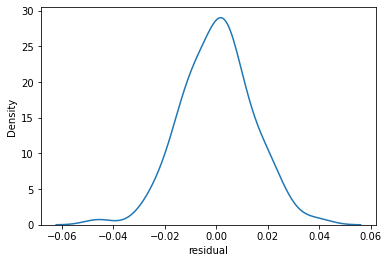

In [287]:
sns.kdeplot(e.residual)

Nhìn đồ thị, ta có thể thấy đồ thị phần dư tuân theo phân phối chuẩn. Thoả mãn giả định 1

## Giả định 2: Biến tiên của phần dư là đồng nhất giữa giá trị dự đoán

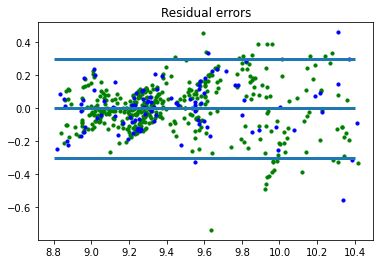

In [283]:
# plot for residual error 
  
## setting plot style 
#plt.style.use('fivethirtyeight') 
  
## plotting residual errors in training data 
plt.scatter(pipline.predict(X_train), pipline.predict(X_train) - y_train, 
            color = "green", s = 10, label = 'Train data') 
  
## plotting residual errors in test data 
plt.scatter(pipline.predict(X_test), pipline.predict(X_test) - y_test, 
            color = "blue", s = 10, label = 'Test data') 
  
## plotting line for zero residual error 
plt.hlines(y = 0, xmin =8.8 , xmax = 10.4, linewidth = 3) 
plt.hlines(y = 0.3, xmin =8.8 , xmax = 10.4, linewidth = 3) 
plt.hlines(y = -0.3, xmin =8.8 , xmax = 10.4, linewidth = 3) 
## plot title 
plt.title("Residual errors") 
  
## function to show plot 
plt.show() 

 - Ta có thấy mô hình đã vi phạm giả định 2, phương sai thay đổi. dẫn đến ước lượng hồi quy bị sai lệch. Ta quay lại xử lý với biến income 



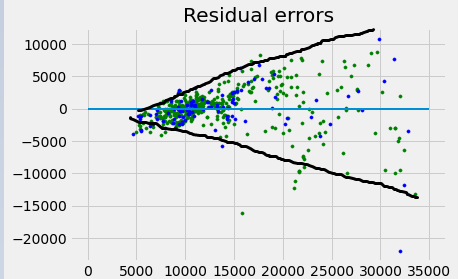
- Sau khi xử lý với biến income ta thấy kế quả khá tốt
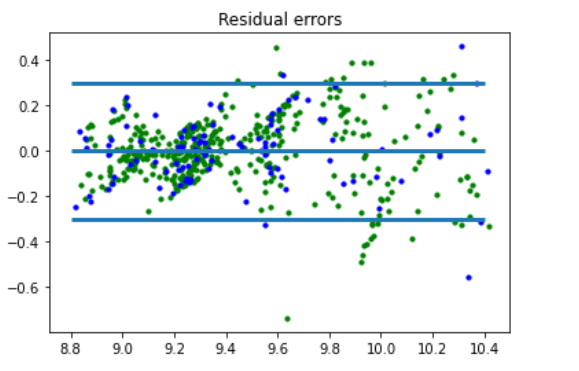